In [603]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [604]:
data_train = pd.read_csv('train(1).csv')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [605]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [606]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [607]:
test = pd.read_csv('test.csv')
# test

<AxesSubplot:xlabel='Age', ylabel='Count'>

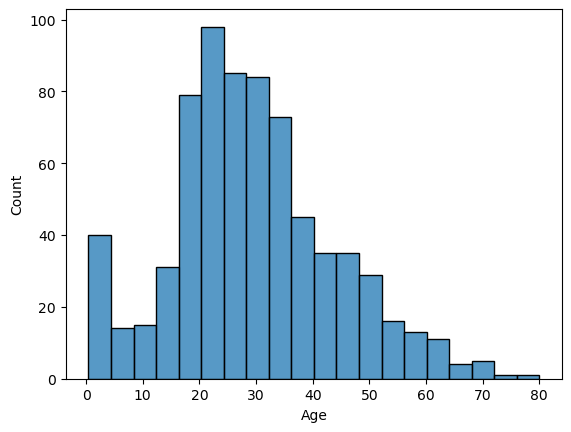

In [608]:
sbn.histplot(data_train['Age'])

c:\Users\gosha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

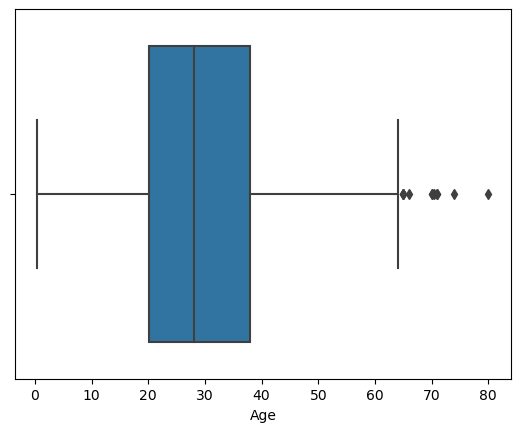

In [609]:
sbn.boxplot(data_train['Age'])

In [610]:
data_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [611]:
print('медианный возраст по полу: \n', data_train.groupby('Sex')['Age'].median(), '\n')
print('средний возраст по полу: \n', data_train.groupby('Sex')['Age'].mean())

медианный возраст по полу: 
 Sex
female    27.0
male      29.0
Name: Age, dtype: float64 

средний возраст по полу: 
 Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64


In [612]:
print('средний возраст по полу и классу: \n', data_train.groupby(['Pclass', 'Sex'])['Age'].mean(), '\n')

print('мединный возраст по полу и классу: \n', data_train.groupby(['Pclass', 'Sex'])['Age'].median())

средний возраст по полу и классу: 
 Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64 

мединный возраст по полу и классу: 
 Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64


In [613]:
data_train.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

Заполню пустые значания Age в соответствии с распределением возраста по полу и классу билета выше. 

In [614]:
def set_age(data_train):
    data_train.loc[(data_train['Age'].isnull()) & (data_train['Pclass'] == 1) & (data_train['Sex'] == 'female'), 'Age'] = data_train.groupby(['Pclass', 'Sex'])['Age'].median().loc[1, 'female']
                        
    data_train.loc[(data_train['Age'].isnull()) & (data_train['Pclass'] == 1) & (data_train['Sex'] == 'male'), 'Age'] = data_train.groupby(['Pclass', 'Sex'])['Age'].median().loc[1, 'male']

    data_train.loc[(data_train['Age'].isnull()) & (data_train['Pclass'] == 2) & (data_train['Sex'] == 'female'), 'Age'] = data_train.groupby(['Pclass', 'Sex'])['Age'].median().loc[2, 'female']

    data_train.loc[(data_train['Age'].isnull()) & (data_train['Pclass'] == 2) & (data_train['Sex'] == 'male'), 'Age'] = data_train.groupby(['Pclass', 'Sex'])['Age'].median().loc[2, 'male']

    data_train.loc[(data_train['Age'].isnull()) & (data_train['Pclass'] == 3) & (data_train['Sex'] == 'female'), 'Age'] = data_train.groupby(['Pclass', 'Sex'])['Age'].median().loc[3, 'female']

    data_train.loc[(data_train['Age'].isnull()) & (data_train['Pclass'] == 3) & (data_train['Sex'] == 'male'), 'Age'] = data_train.groupby(['Pclass', 'Sex'])['Age'].median().loc[3, 'male']

    return data_train

In [615]:
set_age(data_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [616]:
# data_train.loc[(data_train['Age'].isnull()) & (data_train['Pclass'] == 1) & (data_train['Sex'] == 'female'), 'Age'] = data_train.groupby(['Pclass', 'Sex'])['Age'].median().loc[1, 'female']
                     
# data_train.loc[(data_train['Age'].isnull()) & (data_train['Pclass'] == 1) & (data_train['Sex'] == 'male'), 'Age'] = data_train.groupby(['Pclass', 'Sex'])['Age'].median().loc[1, 'male']

# data_train.loc[(data_train['Age'].isnull()) & (data_train['Pclass'] == 2) & (data_train['Sex'] == 'female'), 'Age'] = data_train.groupby(['Pclass', 'Sex'])['Age'].median().loc[2, 'female']

# data_train.loc[(data_train['Age'].isnull()) & (data_train['Pclass'] == 2) & (data_train['Sex'] == 'male'), 'Age'] = data_train.groupby(['Pclass', 'Sex'])['Age'].median().loc[2, 'male']

# data_train.loc[(data_train['Age'].isnull()) & (data_train['Pclass'] == 3) & (data_train['Sex'] == 'female'), 'Age'] = data_train.groupby(['Pclass', 'Sex'])['Age'].median().loc[3, 'female']

# data_train.loc[(data_train['Age'].isnull()) & (data_train['Pclass'] == 3) & (data_train['Sex'] == 'male'), 'Age'] = data_train.groupby(['Pclass', 'Sex'])['Age'].median().loc[3, 'male']

In [617]:
data_train['Age'].describe()

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

Заполним пропуски в Embarked модальным значением.

In [618]:
data_train['Embarked'].fillna(data_train['Embarked'].value_counts().index[0], inplace = True)

Добавлю колонку Cabin_aviab показывающую было ли пропущено значение в колонке Cabin

In [619]:
# data_train['Cabin_aviab'] = np.where(data_train['Cabin'].isnull(), 0, 1)
# data_train

Преобразую колонку Cabin - Вместо кают A, B, C поставлю просто ABC и т.д.

In [620]:
# data_train['Cabin'] = data_train['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
# # M - Miss
# data_train[data_train["Cabin"] == "T"]

# data_train['Cabin'] = data_train['Cabin'].replace(['A', 'B', 'C'], 'ABC')
# data_train['Cabin'] = data_train['Cabin'].replace(['D', 'E'], 'DE')
# data_train['Cabin'] = data_train['Cabin'].replace(['F', 'G'], 'FG')

# data_train['Cabin'].value_counts()

In [621]:
def set_cabine(data_train):
    data_train['Cabin_aviab'] = np.where(data_train['Cabin'].isnull(), 0, 1)
    
    data_train['Cabin'] = data_train['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
    # M - Miss
    # data_train[data_train["Cabin"] == "T"]

    data_train['Cabin'] = data_train['Cabin'].replace(['A', 'B', 'C'], 'ABC')
    data_train['Cabin'] = data_train['Cabin'].replace(['D', 'E', 'T'], 'DE')
    data_train['Cabin'] = data_train['Cabin'].replace(['F', 'G'], 'FG')

    return data_train

In [622]:
set_cabine(data_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_aviab
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,ABC,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,ABC,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,ABC,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,M,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,ABC,C,1


Попробуем поработать с титулами

In [623]:
def set_title(data_train):
    data_train['Title'] = data_train['Name'].apply(lambda x: x.split('.')[0].split(',')[1].strip())
    title = data_train['Title'].value_counts()[:9].index.tolist()

    data_train['Title'] = data_train['Title'].apply(lambda x: x if x in title else 'other')

    return data_train

In [624]:
set_title(data_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_aviab,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,ABC,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,ABC,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,ABC,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,M,S,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,ABC,C,1,Mr


In [625]:
# data_train['Title'] = data_train['Name'].apply(lambda x: x.split('.')[0].split(',')[1].strip())
# title = data_train['Title'].value_counts()[:9].index.tolist()

In [626]:
# data_train['Title'] = data_train['Title'].apply(lambda x: x if x in title else 'other')
# data_train['Title'].value_counts()

Посмотрим на билеты

In [627]:
def set_fr_tic(data_train):
    frequency_ticket = data_train['Ticket'].value_counts().sort_values(ascending=True).reset_index()
    frequency_ticket.columns = ['Ticket', 'Frequency_Ticket']

    data_train = data_train.merge(frequency_ticket, on='Ticket', how='left')

    return data_train

In [628]:
data_train = set_fr_tic(data_train)

In [629]:
# data_train['Ticket'].value_counts()

In [630]:
# frequency_ticket = data_train['Ticket'].value_counts().sort_values(ascending=True).reset_index()
# frequency_ticket.columns = ['Ticket', 'Frequency_Ticket']

# data_train = data_train.merge(frequency_ticket, on='Ticket', how='left')

Размер семьи \ путешествует один

In [631]:
def set_fem_size(data_train):
    data_train['Family_size'] = data_train['SibSp'] + data_train['Parch'] + 1
    data_train['is_alone'] = np.where(data_train['Family_size'] == 1, 1, 0)
    
    return data_train

In [632]:
set_fem_size(data_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_aviab,Title,Frequency_Ticket,Family_size,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,0,Mr,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,ABC,C,1,Mrs,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,0,Miss,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,ABC,S,1,Mrs,2,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,0,Mr,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,0,Rev,1,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,ABC,S,1,Miss,1,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,M,S,0,Miss,2,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,ABC,C,1,Mr,1,1,1


In [633]:
# data_train['Family_size'] = data_train['SibSp'] + data_train['Parch'] + 1
# data_train['is_alone'] = np.where(data_train['Family_size'] == 1, 1, 0)

In [634]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_aviab,Title,Frequency_Ticket,Family_size,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,0,Mr,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,ABC,C,1,Mrs,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,0,Miss,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,ABC,S,1,Mrs,2,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,0,Mr,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,0,Rev,1,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,ABC,S,1,Miss,1,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,M,S,0,Miss,2,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,ABC,C,1,Mr,1,1,1


На этом , пока что, работа с признаками закончена.

Категориальные переменные попробуем передать в catboost без изменения, что бы закодировал сам

Удалю ненужные колонки

In [635]:
y = data_train['Survived']
data_train = data_train.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)

In [636]:
from sklearn.model_selection import train_test_split

In [637]:
X = data_train

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=y)

In [638]:
num_columns = X.select_dtypes('float').columns.tolist()
cat_columns = X.drop(num_columns, axis=1).columns.tolist()

In [639]:
# pip install catboost

In [640]:
from catboost import CatBoostClassifier

In [641]:
# from sklearn.pipeline import Pipeline, make_pipeline, FunctionTransformer
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler

# age = FunctionTransformer(set_age(data_train))
# cabine = FunctionTransformer(set_cabine(data_train))
# title = FunctionTransformer(set_title(data_train))
# fam_size = FunctionTransformer(set_fem_size(data_train))
# fr_tic = FunctionTransformer(set_fr_tic(data_train))

# pipe = Pipeline([
#     ('age', age),
#     ('cabine', cabine),
#     ('title', title),
#     ('fam_size', fam_size),
#     ("fr_tic", fr_tic)
# ])

# num = Pipeline([
#     ('scaler', StandardScaler())
# ])

# col_trans = ColumnTransformer([
#     ('pipe', pipe, X.columns),
#     ('num', num, num_columns)
# ])

# col_trans.fit_transform

In [642]:
X.loc[X['Fare'] > 500, 'Fare'] = 60.2875

In [643]:
X[X['Fare'] > 100 ]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_aviab,Title,Frequency_Ticket,Family_size,is_alone
27,1,male,19.00,3,2,263.0000,ABC,S,1,Mr,4,6,0
31,1,female,35.00,1,0,146.5208,ABC,C,1,Mrs,2,2,0
88,1,female,23.00,3,2,263.0000,ABC,S,1,Miss,4,6,0
118,1,male,24.00,0,1,247.5208,ABC,C,1,Mr,2,2,0
195,1,female,58.00,0,0,146.5208,ABC,C,1,Miss,2,1,1
215,1,female,31.00,1,0,113.2750,DE,C,1,Miss,3,2,0
268,1,female,58.00,0,1,153.4625,ABC,S,1,Mrs,3,2,0
269,1,female,35.00,0,0,135.6333,ABC,S,1,Miss,3,1,1
297,1,female,2.00,1,2,151.5500,ABC,S,1,Miss,4,4,0
299,1,female,50.00,0,1,247.5208,ABC,C,1,Mrs,2,2,0


In [644]:
X.groupby(['Pclass', 'Cabin']).agg(['mean', 'median', 'min', 'max', 'std', 'count'])['Fare']

C:\Users\gosha\AppData\Local\Temp\ipykernel_9228\3932931358.py:1: FutureWarning: ['Sex', 'Embarked', 'Title'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  X.groupby(['Pclass', 'Cabin']).agg(['mean', 'median', 'min', 'max', 'std', 'count'])['Fare']


mean   median      min       max        std  count
Pclass Cabin                                                         
1      ABC    90.363429  71.2833   0.0000  263.0000  68.022816    121
       DE     59.371064  55.0000  25.5875  134.5000  28.117811     55
       M      65.547600  44.7500   0.0000  227.5250  56.002796     40
2      DE     12.377088  12.9375  10.5000   13.7917   1.222454      8
       FG     23.750000  26.0000  10.5000   39.0000  11.631239      8
       M      20.909673  15.0229   0.0000   73.5000  13.701631    168
3      DE     11.000000  12.4750   8.0500   12.4750   2.554775      3
       FG     11.931478  10.4625   7.6500   22.3583   5.373429      9
       M      13.725077   8.0500   0.0000   69.5500  11.899245    479

In [645]:
def set_cabine_2(data):
    data1 = data.copy()
    
    data1.loc[(data1['Fare'] >= 65) & (data1['Cabin'] == 'M') & (data1['Pclass'] == 1), 'Cabin'] = 'ABC'
    data1.loc[(data1['Pclass'] == 1) & (data1['Fare'] < 65) & (data1['Cabin'] == 'M'), 'Cabin'] = 'DE'

    data1.loc[(data1['Fare'] <= 13.7) & (data1['Cabin'] == 'M') & (data1['Pclass'] == 2), 'Cabin'] = 'DE'
    data1.loc[(data1['Fare'] > 13.7) & (data1['Cabin'] == 'M') & (data1['Pclass'] == 2), 'Cabin'] = 'FG'

    data1.loc[(data1['Cabin'] == 'M') & (data1['Pclass'] == 3) & (data1['Fare'] >= 12.5), 'Cabin'] = 'FG'
    data1.loc[(data1['Cabin'] == 'M') & (data1['Pclass'] == 3) & (data1['Fare'] < 12.5), 'Cabin'] = 'DE'

    return data1


X = set_cabine_2(X)
# N['Cabin'].value_counts()

In [646]:
X['Cabin'].value_counts()

DE     500
FG     257
ABC    134
Name: Cabin, dtype: int64

In [647]:
from sklearn.preprocessing import StandardScaler

def scaler(data, num_columns):
    scaler = StandardScaler()
    data[num_columns] = scaler.fit_transform(data[num_columns])
    # return data

scaler(X, num_columns)

In [648]:
# pip install optuna

In [649]:
# import optuna
# from optuna.samplers import TPESampler
# from sklearn.model_selection import cross_val_score

# def objective(trial):
#     param = {
#         'learning_rate':trial.suggest_float('learning_rate',0.001,1),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 5),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.01, 10),
#         "n_estimators" : trial.suggest_int('n_estimators', 10, 1500, 10),
#         'depth': trial.suggest_int('depth', 1, 16, 1)
#     }

#     model = CatBoostClassifier(silent=True, **param, cat_features=cat_columns, random_strength=1)
#     # return model.score(X_test, y_test)
#     return  cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv=5, n_jobs=-1).mean()

# study = optuna.create_study(direction='maximize',sampler=TPESampler())
# study.optimize(lambda trial : objective(trial),n_trials=200, n_jobs=-1)    

In [650]:
# 
#         'learning_rate':trial.suggest_float('learning_rate',0.001,1),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
#         'lambda': trial.suggest_float('lambda', 0.0, 10),
#         "n_estimators" : trial.suggest_int('n_estimators', 10, 100, 10),

Xgbooost

In [651]:
# pip install xgboost
from xgboost import XGBClassifier

In [652]:
from sklearn.preprocessing import OneHotEncoder

In [653]:
# encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# new_X = encoder.fit_transform(X[cat_columns])
# pd.DataFrame(new_X, columns=encoder.get_feature_names_out().tolist())

In [654]:
# nn = pd.concat([pd.DataFrame(new_X, columns=encoder.get_feature_names_out().tolist()), X[num_columns]], axis=1)

In [655]:
def encode(data, cat_columns, num_columns):
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    new_data = encoder.fit_transform(data[cat_columns])
    data = pd.concat([pd.DataFrame(new_data, columns=encoder.get_feature_names_out().tolist()), data[num_columns]], axis=1)

    return data

X = encode(X, cat_columns, num_columns)


In [656]:
# pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC

In [657]:
def smote(X, y):
    # from imblearn.over_sampling import SMOTE

    sm = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=10)
    X_sm, y_sm = sm.fit_resample(X,y)

    return X_sm, y_sm

X, y = smote(X, y)

In [658]:
def adasyn(X, y):
    # from imblearn.over_sampling import SMOTE

    sm = ADASYN(random_state=42, n_neighbors=10, n_jobs=-1)
    X_sm, y_sm = sm.fit_resample(X,y)

    return X_sm, y_sm

# X, y = adasyn(X, y)

In [659]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=y)

In [660]:
from sklearn.model_selection import cross_val_score


In [661]:
model = XGBClassifier()

cross_val_score(model, X, y, scoring = 'accuracy', cv=5, n_jobs=-1).mean()

0.8361519302615192

In [662]:
model.fit(X_train, y_train)
mod_pred = model.predict(X_test)
model.score(X_test, y_test)

0.8036363636363636

In [663]:
ex = pd.Series(model.feature_importances_, index=X.columns) > 0
names = pd.Series(model.feature_importances_, index=X.columns)[ex].index.tolist()
names
X = X[names]

In [664]:
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import cross_val_score

def objective(trial):
    param = {
        'learning_rate':trial.suggest_float('learning_rate',0.001,1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'lambda': trial.suggest_float('lambda', 0.01, 10),
        "n_estimators" : trial.suggest_int('n_estimators', 10, 1500),
        'max_depth': trial.suggest_int('max_depth', 1, 20)
    }

    model = XGBClassifier(**param)
    # return model.score(X_test, y_test)
    return  cross_val_score(model, X, y, scoring = 'accuracy', cv=10, n_jobs=-1).mean()

study = optuna.create_study(direction='maximize',sampler=TPESampler())
study.optimize(lambda trial : objective(trial),n_trials=300, n_jobs=-1)   

[I 2023-06-10 13:35:51,136] A new study created in memory with name: no-name-f38d5dfd-2df3-4011-8939-28d1122b5d66
[I 2023-06-10 13:35:55,094] Trial 0 finished with value: 0.8325271059216013 and parameters: {'learning_rate': 0.547410213288808, 'min_child_weight': 4, 'lambda': 6.601786852209733, 'n_estimators': 999, 'max_depth': 3}. Best is trial 0 with value: 0.8325271059216013.
[I 2023-06-10 13:36:06,025] Trial 1 finished with value: 0.8362051709758133 and parameters: {'learning_rate': 0.3181595323593516, 'min_child_weight': 1, 'lambda': 5.895856362804782, 'n_estimators': 492, 'max_depth': 14}. Best is trial 1 with value: 0.8362051709758133.
[I 2023-06-10 13:36:07,866] Trial 3 finished with value: 0.8288907422852377 and parameters: {'learning_rate': 0.9932504018206525, 'min_child_weight': 2, 'lambda': 4.834686745164796, 'n_estimators': 891, 'max_depth': 14}. Best is trial 1 with value: 0.8362051709758133.
[I 2023-06-10 13:36:07,925] Trial 2 finished with value: 0.8270892410341952 and p

In [665]:
print(study.best_value)
params = study.best_params

0.8479816513761469


In [666]:
# 0.8398132004981319

In [667]:
params

{'learning_rate': 0.12268261448301783,
 'min_child_weight': 5,
 'lambda': 8.399910711080418,
 'n_estimators': 198,
 'max_depth': 5}

In [668]:
X

,Pclass_1,Pclass_2,Pclass_3,Sex_female,SibSp_0,SibSp_1,SibSp_2,Parch_0,Parch_1,Parch_2,...,Frequency_Ticket_4,Frequency_Ticket_7,Family_size_1,Family_size_2,Family_size_3,Family_size_4,Family_size_5,Family_size_7,Age,Fare
0,0.0,0.0,1.0,0.0,0.000000,1.000000,0.000000,1.0,0.000000,0.0,...,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,-0.534891,-0.569851
1,1.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,1.0,0.000000,0.0,...,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.668392,0.987385
2,0.0,0.0,1.0,1.0,1.000000,0.000000,0.000000,1.0,0.000000,0.0,...,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,-0.234070,-0.553435
3,1.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,1.0,0.000000,0.0,...,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.442776,0.545182
4,0.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,1.0,0.000000,0.0,...,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.442776,-0.550395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,0.0,0.0,1.0,1.0,0.564327,0.000000,0.435673,0.0,0.435673,0.0,...,1.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,-1.007013,-0.277819
1094,1.0,0.0,0.0,1.0,0.000000,0.730039,0.269961,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.730039,0.269961,0.0,0.0,0.0,1.686664,0.975874
1095,1.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,1.0,0.000000,0.0,...,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,1.624528,-0.100491
1096,1.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,1.0,0.000000,0.0,...,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,2.450613,1.121133


In [84]:
# {'learning_rate': 0.12268261448301783,
#  'min_child_weight': 5,
#  'lambda': 8.399910711080418,
#  'n_estimators': 198,
#  'max_depth': 5}

# 0.8479816513761469

In [63]:
# def pipeline(data, params, cat_columns, num_columns):

#     set_age(data)
#     set_cabine(data)
#     set_title(data)
#     set_fem_size(data)
#     data = set_fr_tic(data)

#     encode(data, cat_columns, num_columns)

#     scaler = StandardScaler()
#     data[num_columns] = scaler.fit_transform(data[num_columns])

#     data = data.drop(['Name', 'PassengerId', 'Ticket'], axis=1)

#     cat = CatBoostClassifier(silent=True, **params, random_strength=1, cat_features=cat_columns)

#     print(cross_val_score(cat, X_train, y_train, scoring = 'accuracy', cv=5).mean())

#     cat.fit(X_train, y_train)
#     predict = cat.predict(data)

#     return predict

# predict = pipeline(test, params, cat_columns, num_columns)

In [64]:
# 0.8383795309168443

In [65]:
# output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predict})
# output.to_csv('submission.csv', index=False)

In [66]:
def pipeline(data, params, cat_columns, num_columns):

    set_age(data)
    set_cabine(data)
    set_title(data)
    set_fem_size(data)
    data = set_fr_tic(data)

    encode(data, cat_columns, num_columns)

    scaler = StandardScaler()
    data[num_columns] = scaler.fit_transform(data[num_columns])

    data = data.drop(['Name', 'PassengerId', 'Ticket'], axis=1)

    smote(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=y)

    xgb = XGBClassifier(**params)

    print(cross_val_score(xgb, X, y, scoring = 'accuracy', cv=5, n_jobs=-1).mean())

    xgb.fit(X_train, y_train)
    predict = xgb.predict(data)

    return predict

predict = pipeline(test, params, cat_columns, num_columns)

0.8334039020340389


ValueError: Feature shape mismatch, expected: 59, got 13